In this notebook, we will see some tools for doing exploratory data analysis (EDA) on a dataset. 

This is the process of familiarizing yourself with your data, and it typically includes examining the structure and components of your dataset, the distributions of individual variables, and the relationships between two or more variables.

We'll be using the [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) dataset, which contains size measurements for three penguin species observed on three islands in the Palmer Archipelago of Antarctica.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
penguins = pd.read_csv('data/penguins.csv')

We can start by looking at the first few rows.

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Question: Do you notice anything when you look at the first five rows of data?**

Let's look and see how many null values we have. We can do this by using the `.info()` method.

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Another way to count null values is by using the `.isna()` method.

In [7]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## Variable Types

The tools that we use to understand a varaible depend on the type variable we are looking at. Broadly speaking, there are two type of variables:

**Categorical Variables:**  Express a qualitative attribute. Examples: hair color, eye color, religion, favorite movie, gender

**Numeric Variables:** Variables that are measured in terms of numbers. Examples: height, weight, shoe size

## Categorical Variables

For categorical variables, we can start by getting a count by category. This can be accomplished in pandas by using `value_counts` method.

In [9]:
penguins['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

Notice that the NaN values do not show up. Place your cursor inside the parantheses for `value_counts` and press Shift+Tab to look for a way to retain the NaN values.

In [6]:
penguins['sex'].value_counts(dropna = False)

male      168
female    165
NaN        11
Name: sex, dtype: int64

Notice also that we can normalize our value counts in order to get percents/proportions. For example, to get the percentage by species, we can use this: 

In [7]:
penguins['sex'].value_counts(normalize = True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

If we want to create a plot showing the number of penguins per species, we can do so using the `.plot` method. We need to specify that we want to create a bar chart.

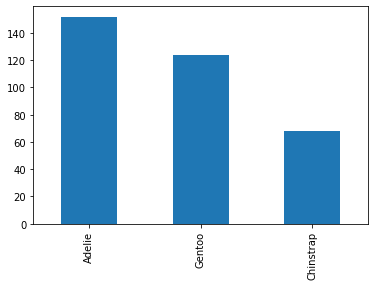

In [8]:
penguins['species'].value_counts().plot(kind = 'bar');

The default plot can be improved using a combination of arguments and matplotlib methods.

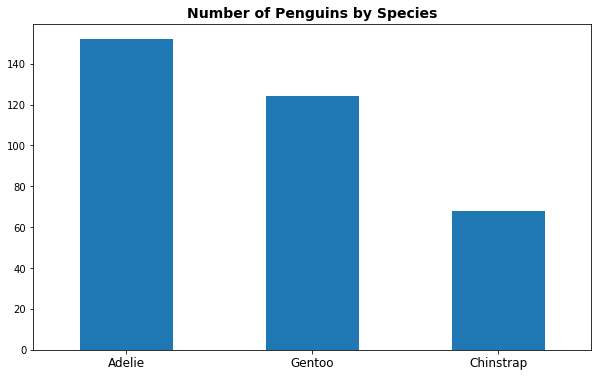

In [19]:
penguins['species'].value_counts().plot(kind = 'bar',
                                        figsize = (10,6))               # Increase the plot size                

plt.xticks(rotation = 0,                                                # Remove the rotation of the labels
           fontsize = 12)                   
plt.title('Number of Penguins by Species',                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

## Numeric Variables

When examining a numeric variable, we can start by calculating descriptive statistics. These can include things like mean, median, max, min, standard deviation, and quartiles.

Let's say that we want to study the `body_mass_g` variable.

We can quickly get a quick summary by using the `.describe()` method.

In [24]:
penguins['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

We can also calculate individual summary statistics, many of which have built-in _pandas_ methods.

In [25]:
penguins['body_mass_g'].mean()

4201.754385964912

In [26]:
penguins['body_mass_g'].median()

4050.0

We have a number of options for inspecting the distribution of a numeric variable. In this notebook, we'll look at histograms and box plots.

For histograms, we can use the `.hist()` method from _pandas_.

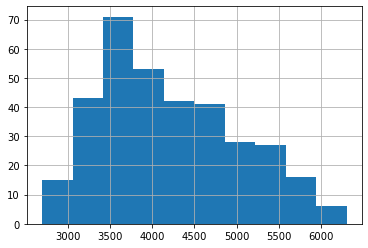

In [27]:
penguins['body_mass_g'].hist();

As before, we can easily make modifications to this plot.

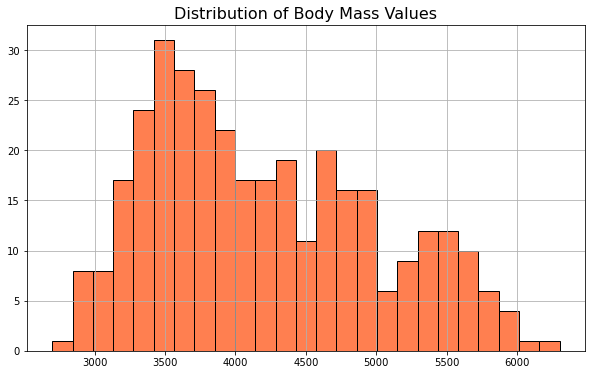

In [28]:
penguins['body_mass_g'].hist(bins = 25,
                            color = 'coral',
                            edgecolor = 'black',
                            figsize = (10,6))

plt.title('Distribution of Body Mass Values', fontsize = 16);

The _pandas_ library also includes a boxplot method, but we can get a nicer looking one using the _seaborn_ library.

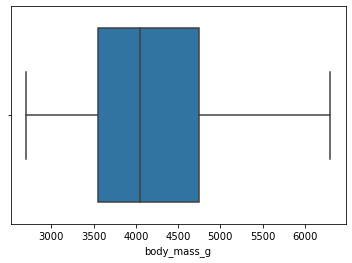

In [29]:
sns.boxplot(data = penguins,
            x = 'body_mass_g');

Note that if we want to increase the figure size when using seaborn, we cannot pass it in as an argument but must use either the `.figure()` or `.subplots()` function from matplotlib.

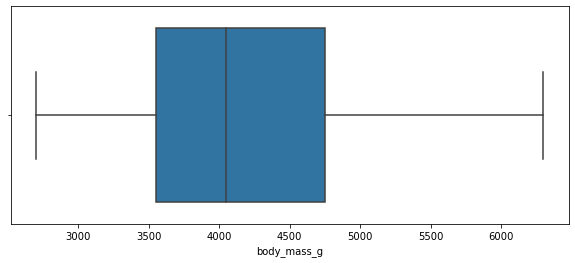

In [30]:
plt.figure(figsize = (10,4))

sns.boxplot(data = penguins,
            x = 'body_mass_g');